In [1]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [2]:
# LOADING GRID FILE AND VARIABLES
!pwd
grid_file = '../DATA/grille.nc' 
print 'file exist:', os.path.isfile(grid_file)

f = Dataset(grid_file) # open netcdf
# extracting variables
lon_t = f.variables['longitude_t'][:] # extracting lon data
lat_t = f.variables['latitude_t'][:] # extracting lat data
depth_t = f.variables['depth_t'][:]
bathy = f.variables['h_w'][:]
print 'Bathy :', np.shape(bathy), 'max :', np.max(bathy), 'min :', np.min(bathy)

f.close()

new_bath = np.ma.masked_where(bathy<200, bathy)

/home/dosa/MON_ENV_PYTHON/ARTICLE_IAV
file exist: True
Bathy : (160, 394) max : 5054.49 min : 20.5226


In [3]:
var_phy1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9'] # new vers
var_phy2 = ['2', '3', '4', '5', '6', '7', '8', '9', '10']

correl_1 = './LAST_OUTPUT_FEV2019/CORREL_FORCING_PCA_2011.nc' 
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_phy1:
    for phyvar2 in var_phy2:
        if int(phyvar2)>int(phyvar):
            vars()['correl_'+phyvar+phyvar2] = f.variables['correl_'+phyvar+phyvar2][0,:,:]# extracting data
            print 'correl_'+phyvar+phyvar2

f.close()

np.shape(correl_68) # (160, 394) seems ok!

# STOP REMOVING NON SIGNIF CORRELATIONS
### We don't use that anymore ###
 
# Removing non significant values
#for phyvar in var_phy:
#    for biovar in var_bio:
#        vars()[biovar+'_'+phyvar][(vars()[biovar+'_'+phyvar]>-0.33)&(vars()[biovar+'_'+phyvar]<0.33)] = np.nan
print ' '        
print 'END of CELL'

file exist: True
correl_12
correl_13
correl_14
correl_15
correl_16
correl_17
correl_18
correl_19
correl_110
correl_23
correl_24
correl_25
correl_26
correl_27
correl_28
correl_29
correl_210
correl_34
correl_35
correl_36
correl_37
correl_38
correl_39
correl_310
correl_45
correl_46
correl_47
correl_48
correl_49
correl_410
correl_56
correl_57
correl_58
correl_59
correl_510
correl_67
correl_68
correl_69
correl_610
correl_78
correl_79
correl_710
correl_89
correl_810
correl_910
 
END of CELL


In [4]:
# test #
test = bathy
test[test<=200] = 0
test[test>200] = np.nan
test[lon_t<-5.5] = np.nan
test[(lat_t>40) & (lon_t>26.9)] = np.nan

END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less


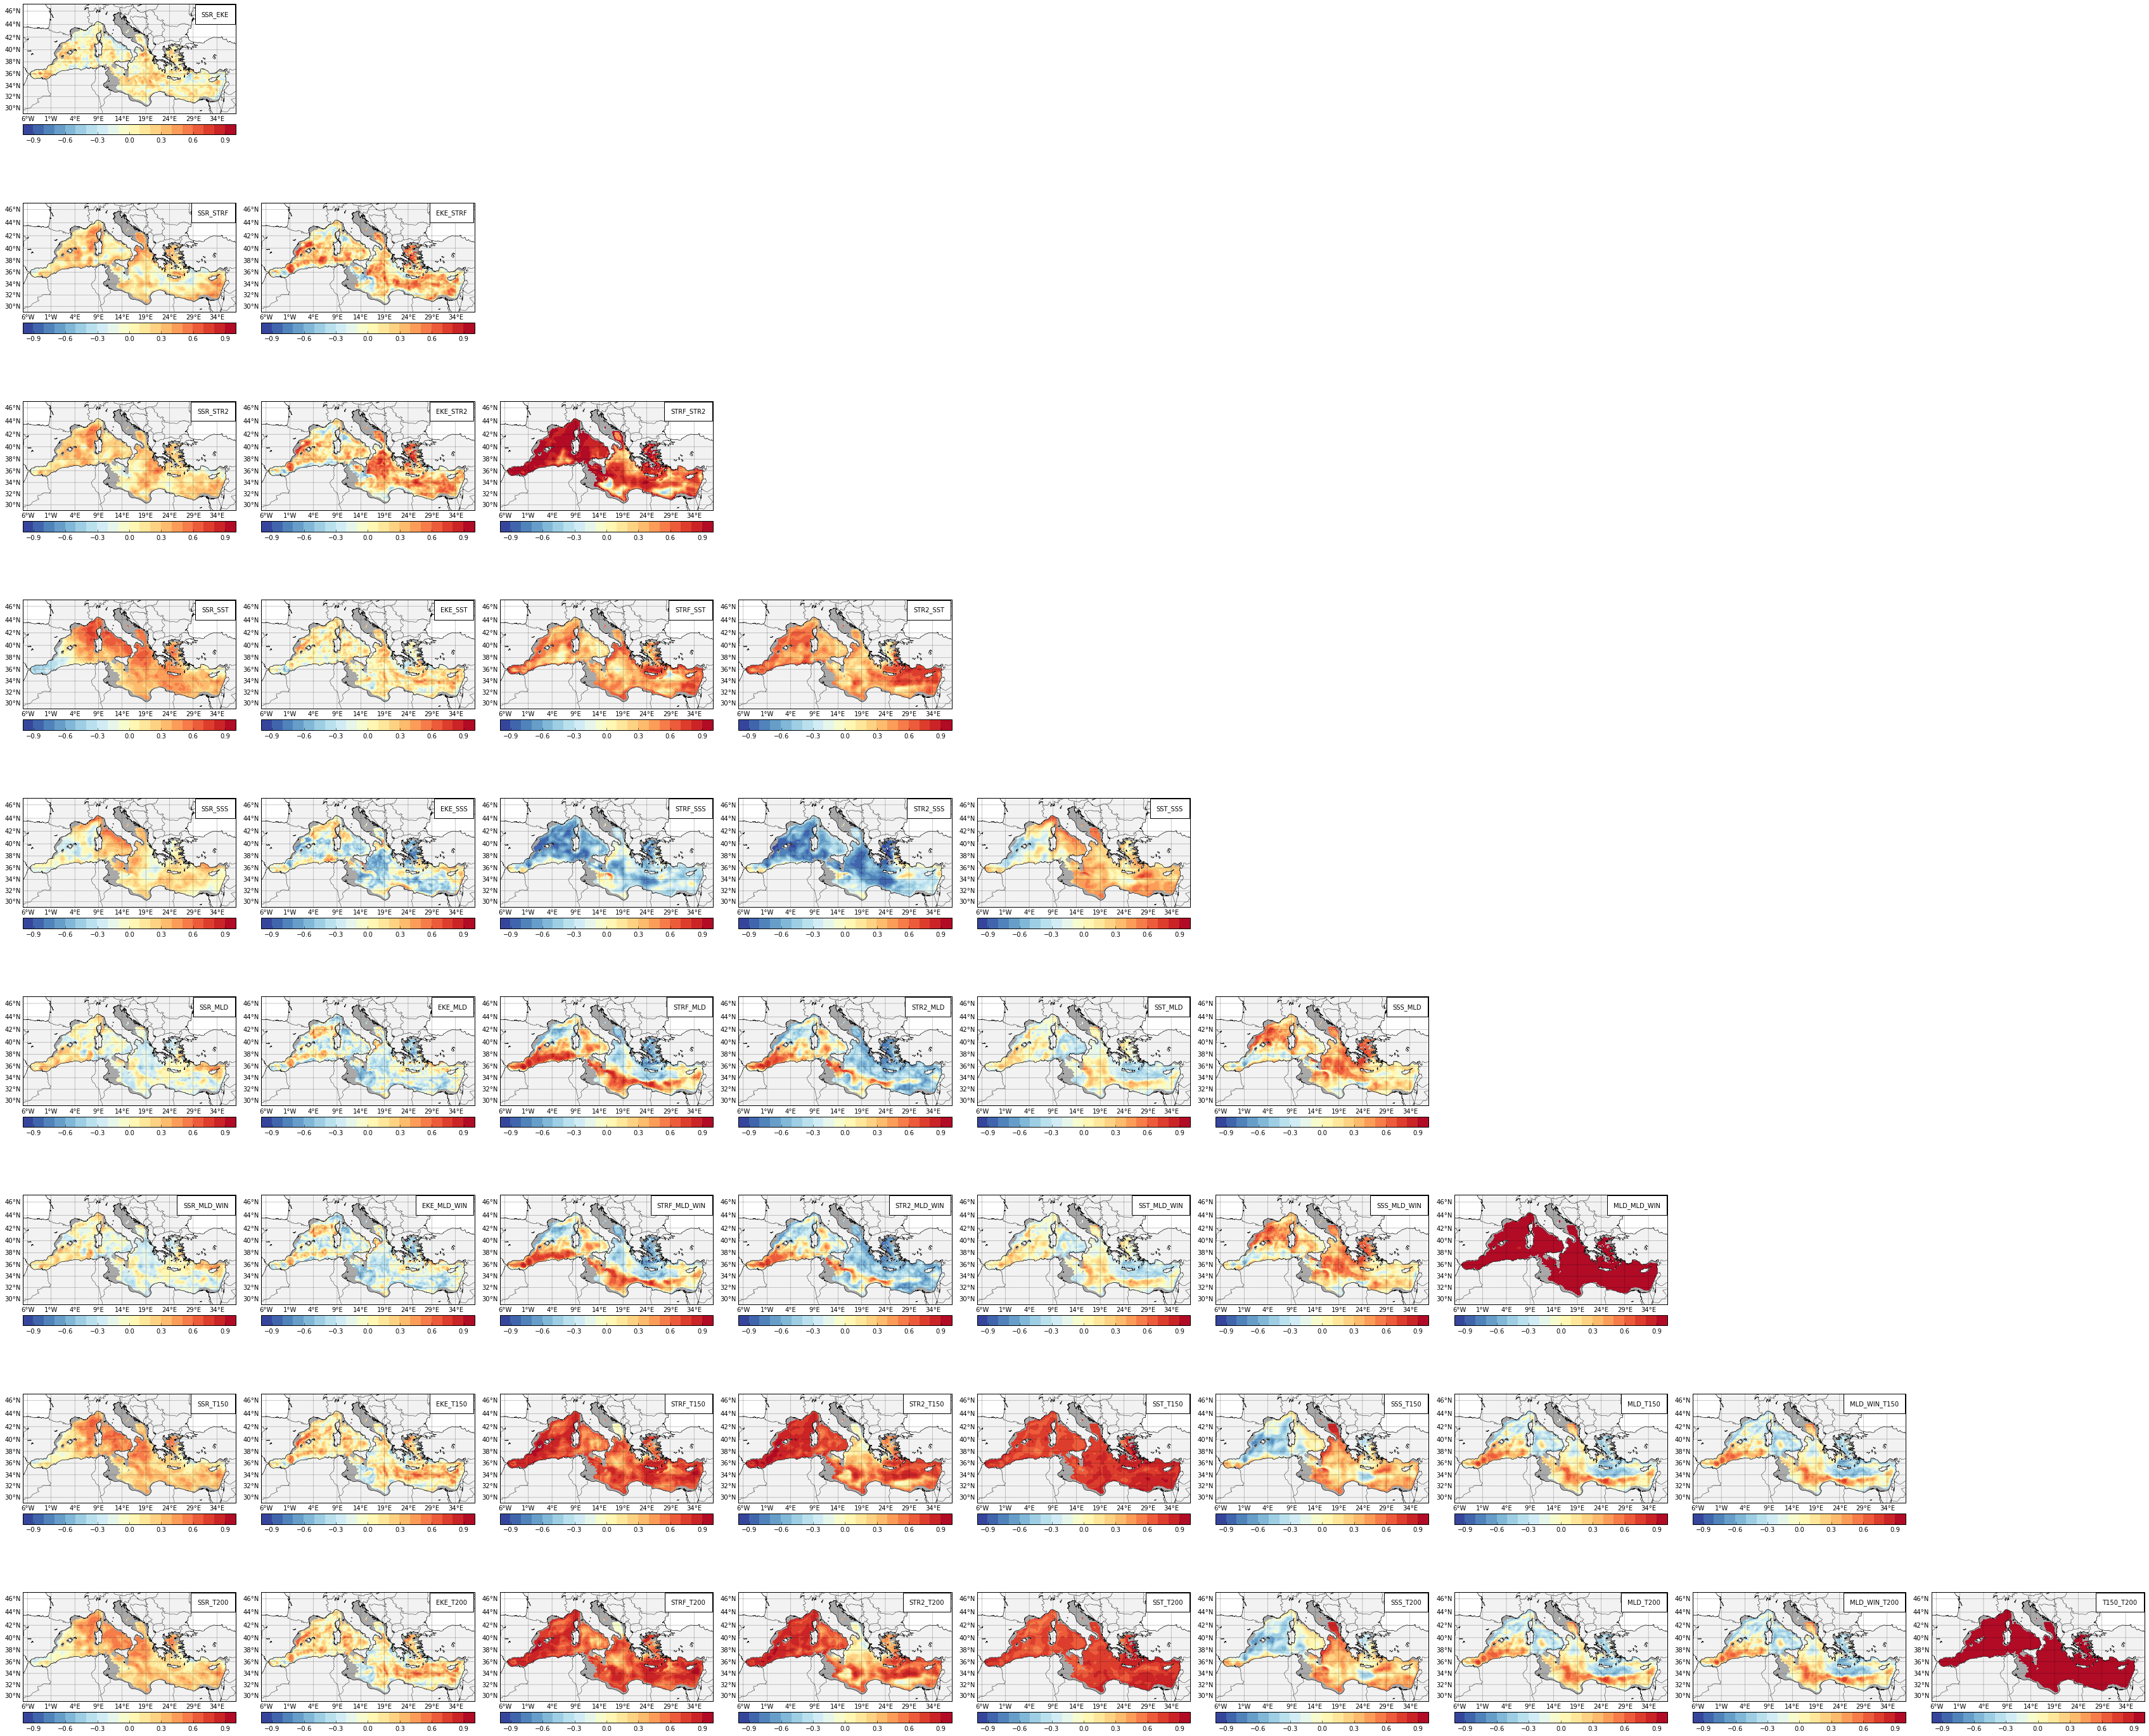

In [13]:
# TEST DISPOSITION FORCINGS #

#var_phy1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9'] # new vers
#var_phy2 = ['2', '3', '4', '5', '6', '7', '8', '9', '10']

var_phy1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9'] # new vers
var_phy2 = ['2', '3', '4', '5', '6', '7', '8', '9', '10']

#var_phy_test = ['SSR', 'EKE', 'STRF', 'STR2', 'SST', 'SSS', 'MLD', 'MLD_WIN'] 

# figure
plt.figure(figsize=(60,50));

#c = 9 
for phyvar in var_phy1:
    c = int(phyvar)+9*(int(phyvar)-1) #11
    for phyvar2 in var_phy2:
        if int(phyvar2)>int(phyvar):
            
            i1 = int(phyvar)
            i2 = int(phyvar2)
            
            # subplot
            #print c
            plt.subplot(9, 9, c) #10

            x1,x2,y1,y2 = -7, 38, 29, 47;
            m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
            ax = fig.add_axes([0.1,0.1,0.8,0.8]);
            m.drawcountries(linewidth=0.4);
            m.drawcoastlines(linewidth=0.6);
            m.fillcontinents(color='0.95',lake_color='white');
            parallels = np.arange(0.,81,2);
            m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
            #meridians = np.arange(-6.,351.,2); # 1.5
            meridians = np.arange(-6.,351.,5); # 1.5
            m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

            # Creating corresponding variable names
            data_to_plot = np.ma.masked_where(bathy<200,vars()['correl_'+phyvar+phyvar2])
            data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

            # doing a map # Données
            xd,yd = m(lon_t,lat_t);
            levels = np.arange(-1,1.1,0.1);
            #levels2 = [-0.3440,0.3440]; # More precise critical value for df=31 (N=33)
            levels_bathy = [200] ;
            m.contourf(xd,yd,test,cmap=plt.cm.Greys);
            CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
            cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu_r);# binary / jet ,levels=levels
            #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
            #plt.colorbar(cs, orientation='horizontal', pad = 0.03)
            
            plt.colorbar(cs, orientation='horizontal', pad = 0.06)
            
            x_text,y_text = m(36.5,46)
            if phyvar == '1':
                phyvar_1 = 'SSR'
            elif phyvar == '2':
                phyvar_1 = 'EKE'
            elif phyvar == '3':
                phyvar_1 = 'STRF'
            elif phyvar == '4':
                phyvar_1 = 'STR2'                
            elif phyvar == '5':
                phyvar_1 = 'SST'
            elif phyvar == '6':
                phyvar_1 = 'SSS'
            elif phyvar == '7':
                phyvar_1 = 'MLD'
            elif phyvar == '8':
                phyvar_1 = 'MLD_WIN'
            elif phyvar == '9':
                phyvar_1 = 'T150'

            if phyvar2 == '2':
                phyvar_2 = 'EKE'
            elif phyvar2 == '3':
                phyvar_2 = 'STRF'
            elif phyvar2 == '4':
                phyvar_2 = 'STR2'                
            elif phyvar2 == '5':
                phyvar_2 = 'SST'
            elif phyvar2 == '6':
                phyvar_2 = 'SSS'
            elif phyvar2 == '7':
                phyvar_2 = 'MLD'
            elif phyvar2 == '8':
                phyvar_2 = 'MLD_WIN'
            elif phyvar2 == '9':
                phyvar_2 = 'T150'
            elif phyvar2 == '10':
                phyvar_2 = 'T200'

            this_txt = str(phyvar_1+'_'+phyvar_2)
            
            plt.text(x_text,y_text, this_txt,fontsize=10,  bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5,
            
            plt.subplots_adjust(hspace=0.1, wspace=0.12)
            c += 9 #10

plt.savefig('/home/dosa/THESE/CR_reunions/FEV2019_FIGS/ALL_FORCINGS_CORR_fig.png',bbox_inches='tight',format='png')

print 'END of CELL'

END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in less


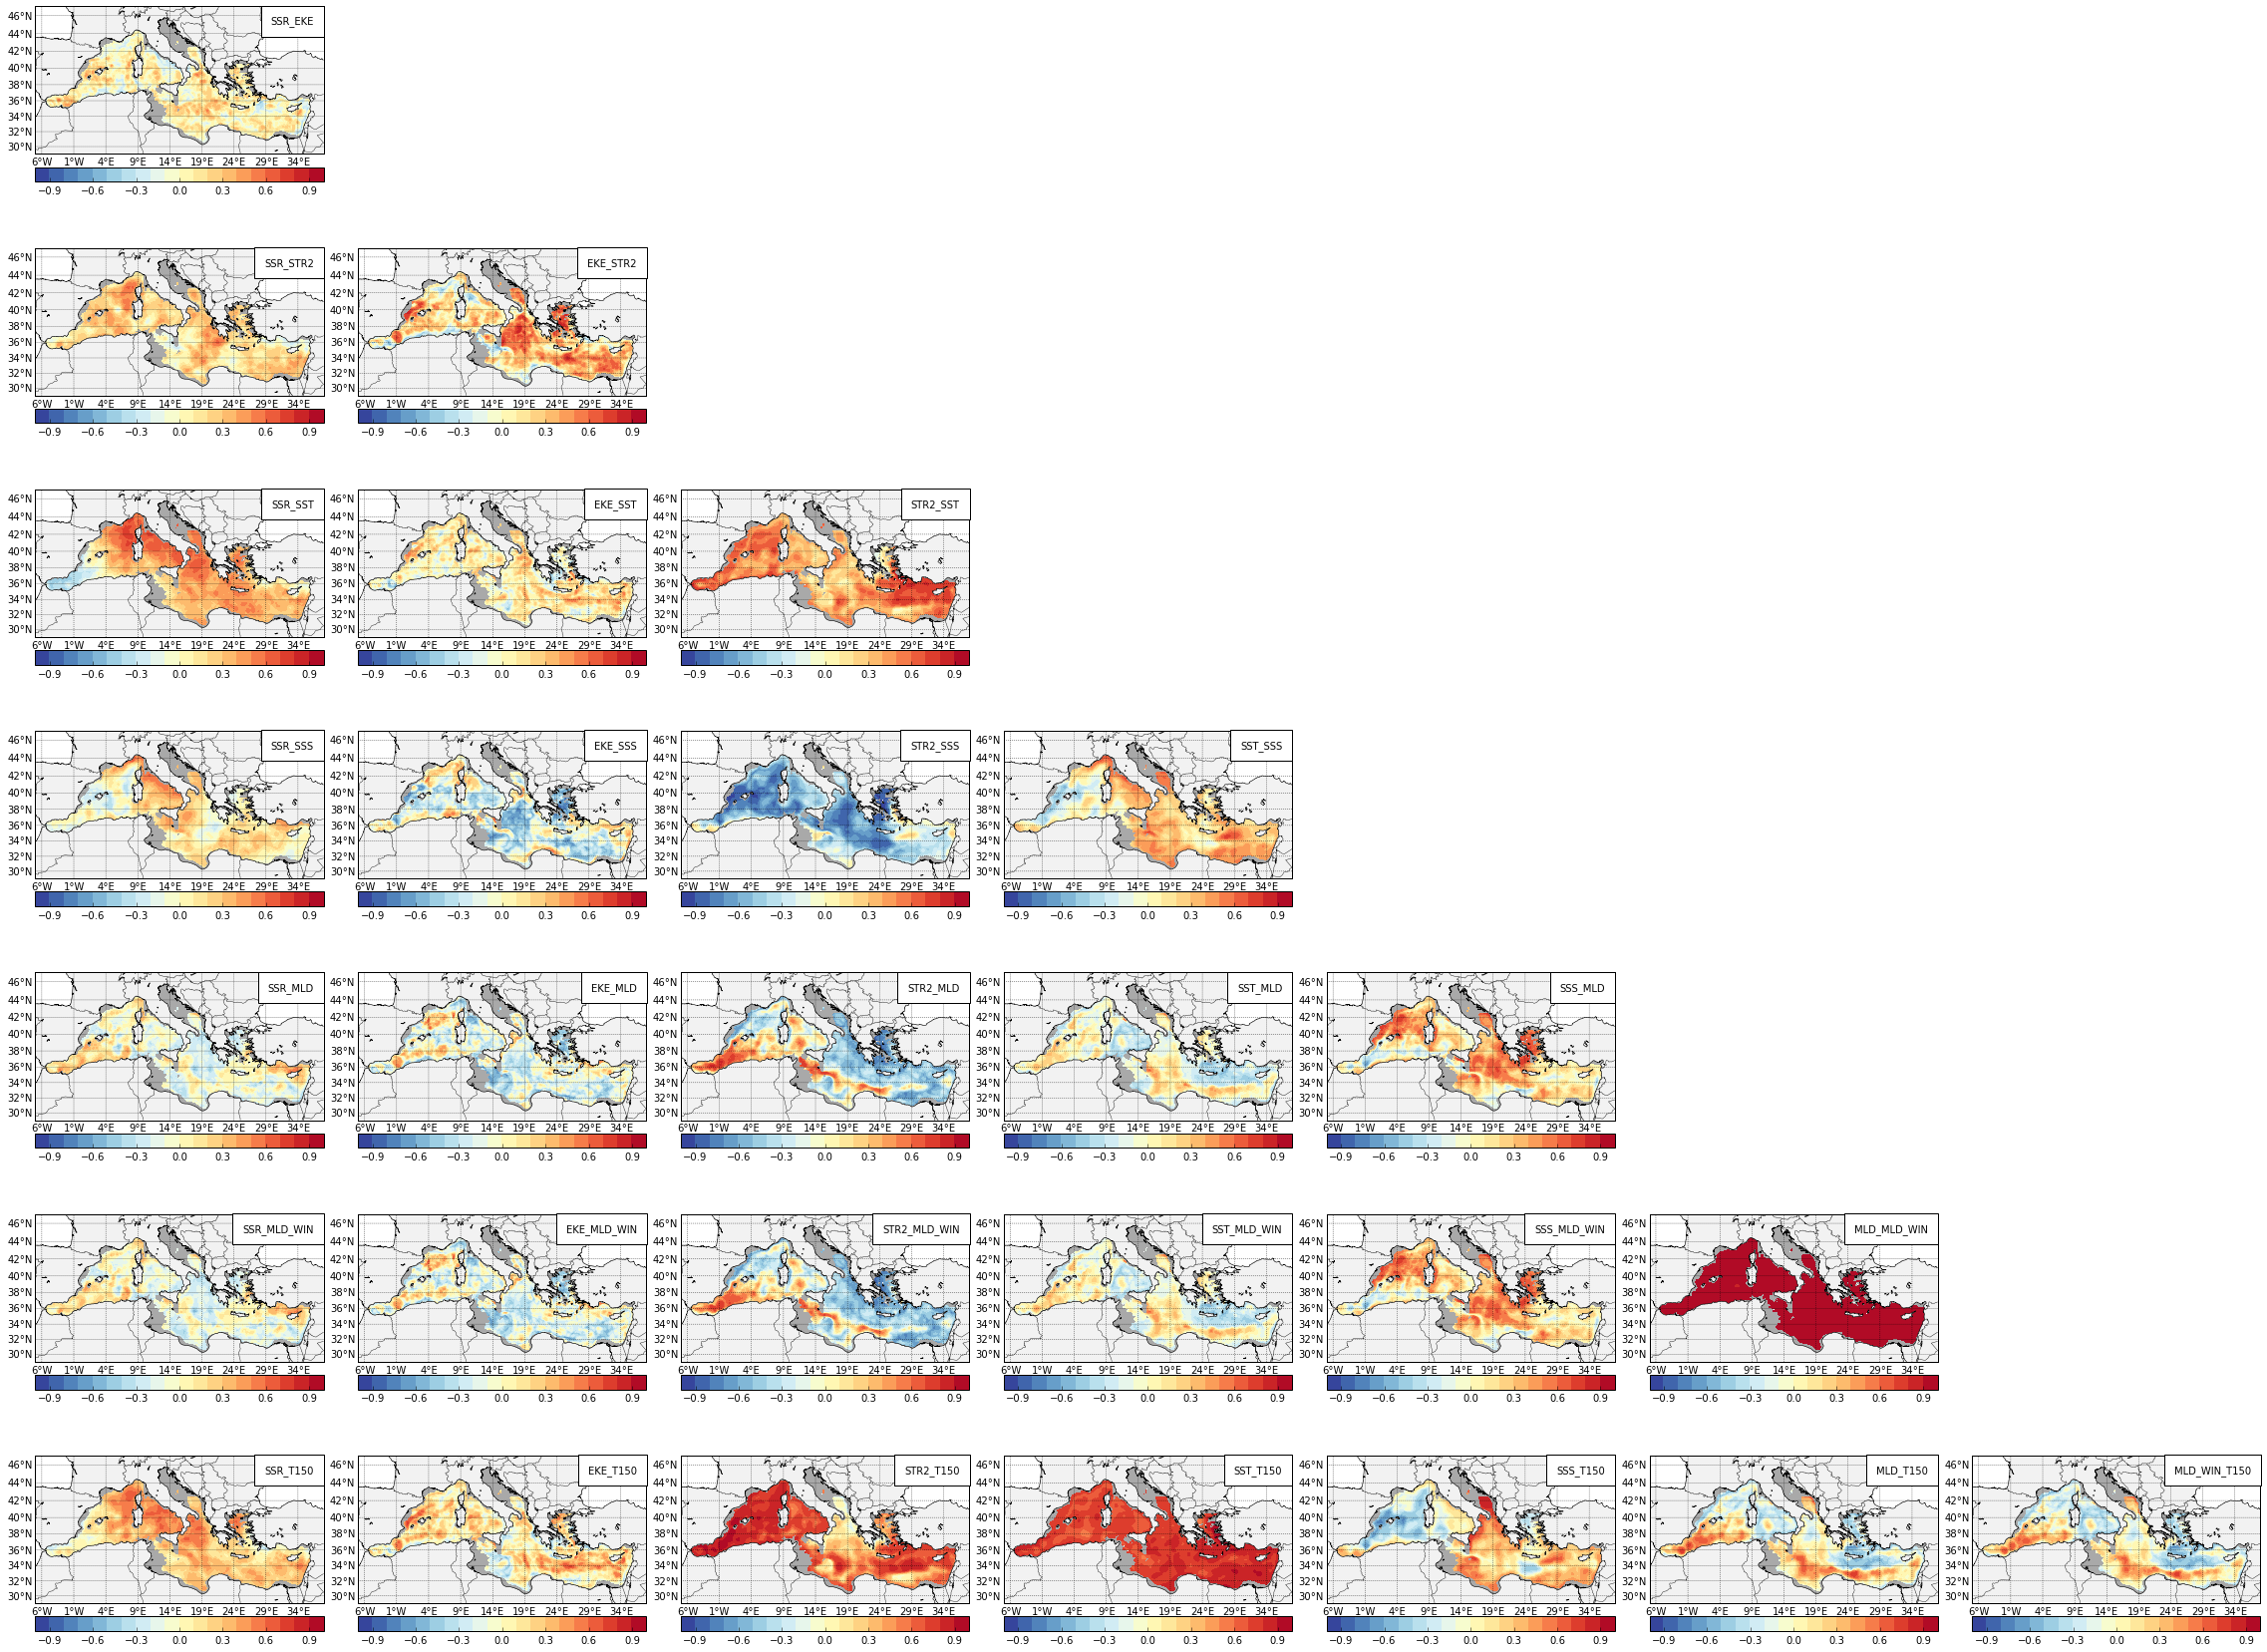

In [21]:
# TEST DISPOSITION FORCINGS #

var_phy1 = ['1', '2', '4', '5', '6', '7', '8'] # new vers
var_phy2 = ['2', '4', '5', '6', '7', '8', '9']

#var_phy_test = ['SSR', 'EKE', 'STRF', 'STR2', 'SST', 'SSS', 'MLD', 'MLD_WIN'] 

# figure
plt.figure(figsize=(40,30));

varphy_i = 1
for phyvar in var_phy1:
    #print 'varphy_i =', varphy_i
    c = int(varphy_i)+7*(int(varphy_i)-1) #11
    for phyvar2 in var_phy2:
        if int(phyvar2)>int(phyvar):
            #print c
            i1 = int(phyvar)
            i2 = int(phyvar2)
            
            # subplot
            plt.subplot(7, 7, c)

            x1,x2,y1,y2 = -7, 38, 29, 47;
            m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
            ax = fig.add_axes([0.1,0.1,0.8,0.8]);
            m.drawcountries(linewidth=0.4);
            m.drawcoastlines(linewidth=0.6);
            m.fillcontinents(color='0.95',lake_color='white');
            parallels = np.arange(0.,81,2);
            m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
            #meridians = np.arange(-6.,351.,2); # 1.5
            meridians = np.arange(-6.,351.,5); # 1.5
            m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

            # Creating corresponding variable names
            data_to_plot = np.ma.masked_where(bathy<200,vars()['correl_'+phyvar+phyvar2])
            data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

            # doing a map # Données
            xd,yd = m(lon_t,lat_t);
            levels = np.arange(-1,1.1,0.1);
            #levels2 = [-0.3440,0.3440]; # More precise critical value for df=31 (N=33)
            levels_bathy = [200] ;
            m.contourf(xd,yd,test,cmap=plt.cm.Greys);
            CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
            cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu_r);# binary / jet ,levels=levels
            #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
            #plt.colorbar(cs, orientation='horizontal', pad = 0.03)
            
            plt.colorbar(cs, orientation='horizontal', pad = 0.06)
            
            x_text,y_text = m(36.5,46)
            if phyvar == '1':
                phyvar_1 = 'SSR'
            elif phyvar == '2':
                phyvar_1 = 'EKE'
            elif phyvar == '3':
                phyvar_1 = 'STRF'
            elif phyvar == '4':
                phyvar_1 = 'STR2'                
            elif phyvar == '5':
                phyvar_1 = 'SST'
            elif phyvar == '6':
                phyvar_1 = 'SSS'
            elif phyvar == '7':
                phyvar_1 = 'MLD'
            elif phyvar == '8':
                phyvar_1 = 'MLD_WIN'
            elif phyvar == '9':
                phyvar_1 = 'T150'

            if phyvar2 == '2':
                phyvar_2 = 'EKE'
            elif phyvar2 == '3':
                phyvar_2 = 'STRF'
            elif phyvar2 == '4':
                phyvar_2 = 'STR2'                
            elif phyvar2 == '5':
                phyvar_2 = 'SST'
            elif phyvar2 == '6':
                phyvar_2 = 'SSS'
            elif phyvar2 == '7':
                phyvar_2 = 'MLD'
            elif phyvar2 == '8':
                phyvar_2 = 'MLD_WIN'
            elif phyvar2 == '9':
                phyvar_2 = 'T150'
            elif phyvar2 == '10':
                phyvar_2 = 'T200'

            this_txt = str(phyvar_1+'_'+phyvar_2)
            
            plt.text(x_text,y_text, this_txt,fontsize=10,  bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5,
            
            plt.subplots_adjust(hspace=0.1, wspace=0.12)
            c += 7
    varphy_i += 1

plt.savefig('/home/dosa/THESE/CR_reunions/FEV2019_FIGS/ALL_FORCINGS_CORR_v2.png',bbox_inches='tight',format='png')

print 'END of CELL'

END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in less


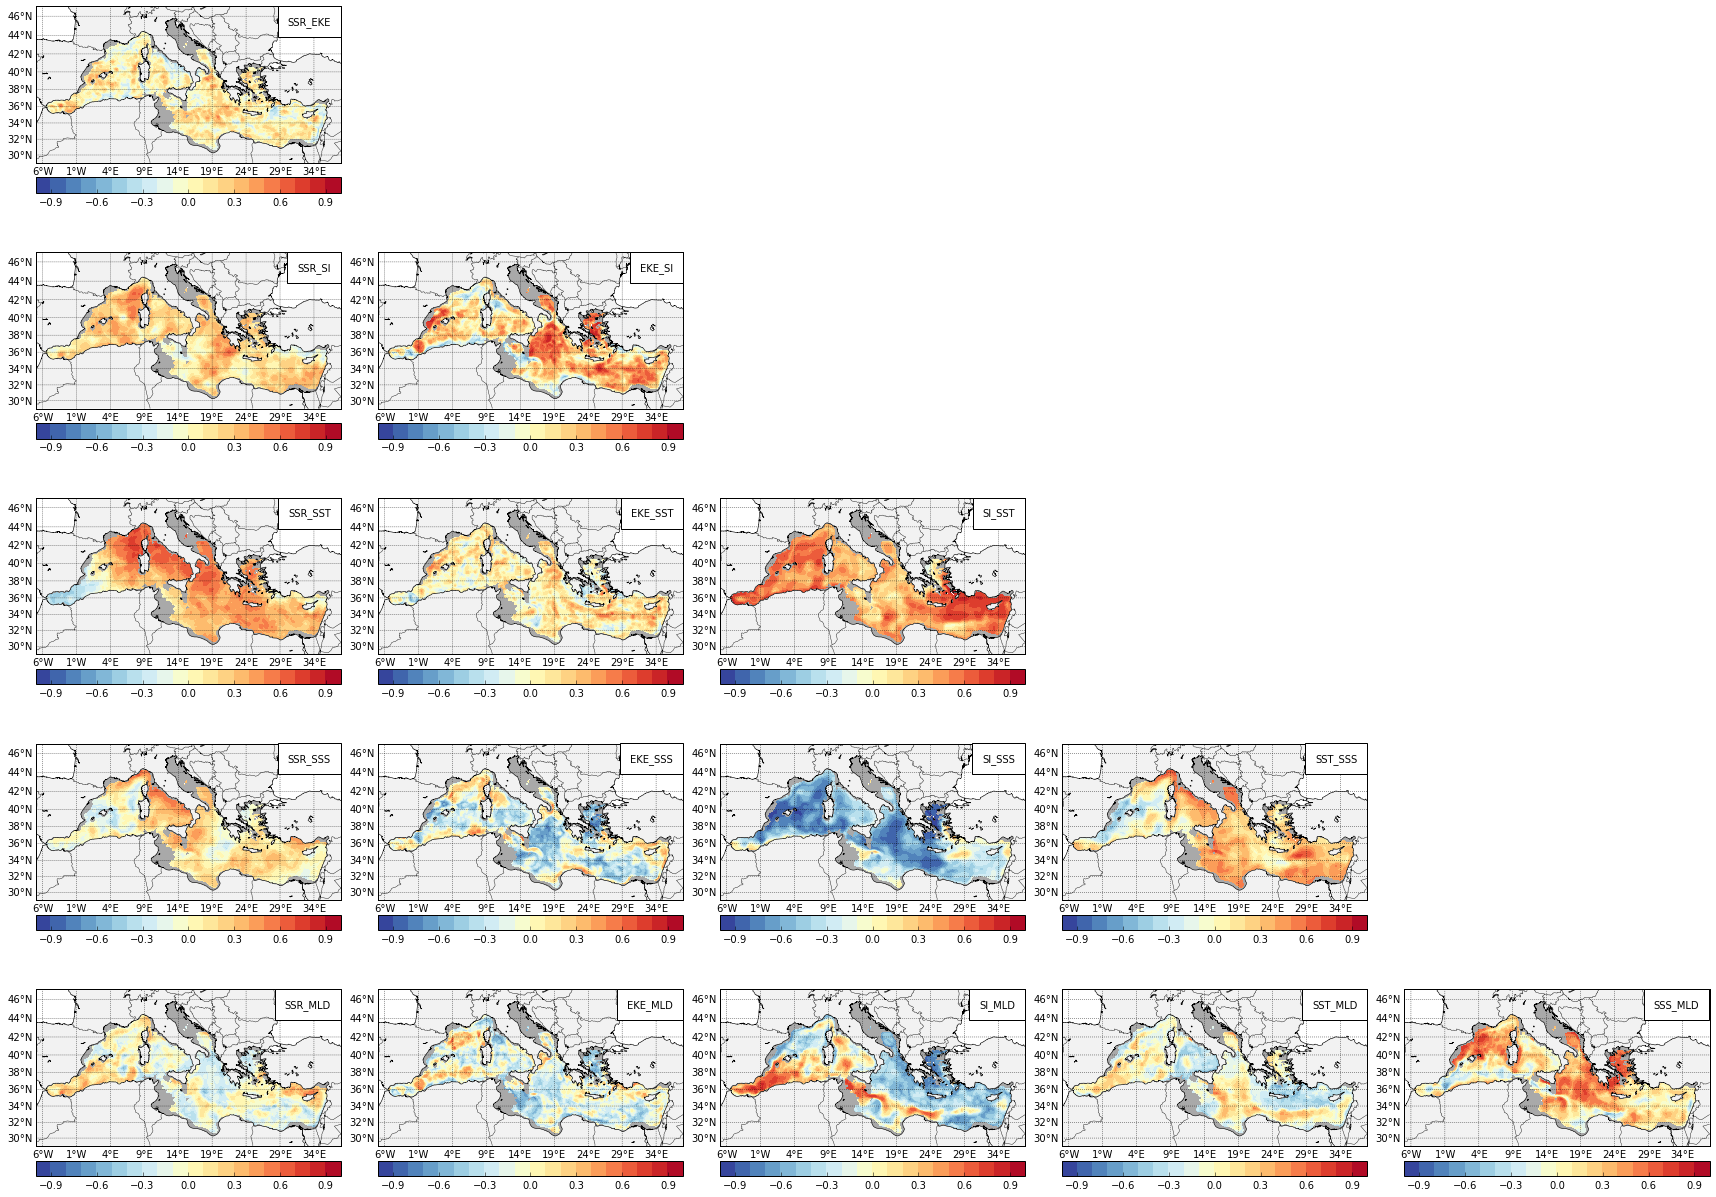

In [13]:
# 14/03 UPDATED FIG #

var_phy1 = ['1', '2', '4', '5', '6'] # new vers
var_phy2 = ['2', '4', '5', '6', '7']

#var_phy_test = ['SSR', 'EKE', 'STRF', 'STR2', 'SST', 'SSS', 'MLD', 'MLD_WIN'] 

# figure
#fig = plt.figure(figsize=(40,30));
plt.figure(figsize=(30,22));

varphy_i = 1
for phyvar in var_phy1:
    #print 'varphy_i =', varphy_i
    c = int(varphy_i)+5*(int(varphy_i)-1) 
    for phyvar2 in var_phy2:
        if int(phyvar2)>int(phyvar):
            #print c
            i1 = int(phyvar)
            i2 = int(phyvar2)
            
            # subplot
            plt.subplot(5, 5, c)

            x1,x2,y1,y2 = -7, 38, 29, 47;
            m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
            ax = fig.add_axes([0.1,0.1,0.8,0.8]);
            m.drawcountries(linewidth=0.4);
            m.drawcoastlines(linewidth=0.6);
            m.fillcontinents(color='0.95',lake_color='white');
            parallels = np.arange(0.,81,2);
            m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
            #meridians = np.arange(-6.,351.,2); # 1.5
            meridians = np.arange(-6.,351.,5); # 1.5
            m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

            # Creating corresponding variable names
            data_to_plot = np.ma.masked_where(bathy<200,vars()['correl_'+phyvar+phyvar2])
            data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

            # doing a map # Données
            xd,yd = m(lon_t,lat_t);
            levels = np.arange(-1,1.1,0.1);
            #levels2 = [-0.3440,0.3440]; # More precise critical value for df=31 (N=33)
            levels_bathy = [200] ;
            m.contourf(xd,yd,test,cmap=plt.cm.Greys);
            CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
            cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu_r);# binary / jet ,levels=levels
            #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
            #plt.colorbar(cs, orientation='horizontal', pad = 0.03)
            
            plt.colorbar(cs, orientation='horizontal', pad = 0.06)
            
            x_text,y_text = m(36.5,46)
            if phyvar == '1':
                phyvar_1 = 'SSR'
            elif phyvar == '2':
                phyvar_1 = 'EKE'
            elif phyvar == '4':
                phyvar_1 = 'SI'                
            elif phyvar == '5':
                phyvar_1 = 'SST'
            elif phyvar == '6':
                phyvar_1 = 'SSS'
            elif phyvar == '7':
                phyvar_1 = 'MLD'


            if phyvar2 == '2':
                phyvar_2 = 'EKE'
            elif phyvar2 == '4':
                phyvar_2 = 'SI'                
            elif phyvar2 == '5':
                phyvar_2 = 'SST'
            elif phyvar2 == '6':
                phyvar_2 = 'SSS'
            elif phyvar2 == '7':
                phyvar_2 = 'MLD'
            this_txt = str(phyvar_1+'_'+phyvar_2)
            
            plt.text(x_text,y_text, this_txt,fontsize=10,  bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5,
            
            plt.subplots_adjust(hspace=0.005, wspace=0.12)
            c += 5
    varphy_i += 1

plt.savefig('/home/dosa/THESE/CR_reunions/MAR2019_FIGS/PHYSIC_FORCINGS_CORRELATIONS5.png',bbox_inches='tight',format='png')

print 'END of CELL'